# Energy: Root mean square

Inspired by and based on Valerio Velardo's 'The Sound of AI' Link: https://www.youtube.com/watch?v=iCwMQJnKk2c&list=PL-wATfeyAMNqIee7cH3q1bh4QJFAaeNv0


### TO DO
-[] get it working

## 0. Install & import

In [2]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# to do: https://docs.python.org/3/library/audioop.html
audioop.rms(fragment, width)

## 1. Basic example RMS Energy with Librosa

In [13]:
pwd

'/Users/michielbontenbal/Documents/GitHub/Notebooks'

In [14]:
cd oe_wavs

/Users/michielbontenbal/Documents/GitHub/Notebooks/oe_wavs


In [16]:
from glob import glob
my_wavs = glob('*.wav')
print(my_wavs)

['record_1630520911.wav', 'new_file.wav', 'record_1630521211.wav', 'record_1630521001.wav', 'record_1630521271.wav', 'record_1630520971.wav', 'record_1630521061.wav', 'record_1630521091.wav', 'record_1630520761.wav', 'record_1630520941.wav', 'record_1630520821.wav', 'record_1630521121.wav', 'record_1630521241.wav', 'record_1630521151.wav', 'record_1630521031.wav', 'record_1630520851.wav', 'record_1630520881.wav', 'record_1630521181.wav']


In [57]:
audio_path = my_wavs[4]

In [104]:
y, conv_sr = librosa.load(audio_path)
print(f'y: {y[:10]}')
print(f'shape y: {y.shape[0]}')
print(f'Converted sample rate: {conv_sr}')

y: [-0.11591184 -0.13706306 -0.12006184 -0.12880716 -0.13842943 -0.13402836
 -0.14053532 -0.14783685 -0.1467371  -0.1523452 ]
shape y: 661500
Converted sample rate: 22050


In [103]:
real_sr = librosa.get_samplerate(audio_path)
real_sr

16000

In [93]:
x= y.shape[0]/sr
print (f'the length of the sample is {x} seconds')

the length of the sample is 30.0 seconds


In [47]:
#We will use librosa's example 'trumpet'
#audio_path = librosa.ex('trumpet')
import IPython
IPython.display.Audio(audio_path)

In [59]:
# source: https://librosa.org/doc/main/generated/librosa.feature.rms.html
#y, sr = librosa.load(librosa.ex('trumpet'))
librosa.feature.rms(y=y)

array([[0.15018326, 0.17121106, 0.18041427, ..., 0.07412899, 0.08509408,
        0.07781725]], dtype=float32)

In [60]:
#or from a spectrogram
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)
print(rms[0:10])

[[0.10087662 0.12512453 0.10510312 ... 0.04385496 0.06237659 0.05448068]]


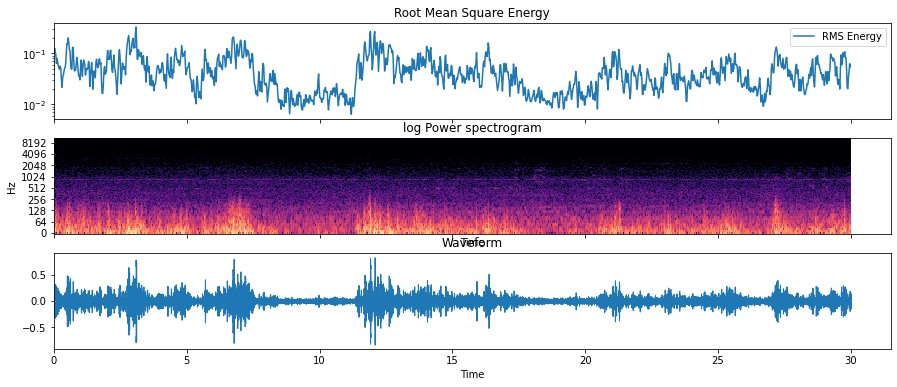

In [61]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(15,6))
times = librosa.times_like(rms)
ax[0].set(title= 'Root Mean Square Energy')
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time',ax=ax[1])
ax[1].set(title='log Power spectrogram')
S = librosa.magphase(librosa.stft(y, window=np.ones, center=False))[0]
librosa.feature.rms(y=y)
ax[2].set(title= 'Waveform')
librosa.display.waveshow(y, sr=sr) # used to be: librosa.display.waveplot
plt.show()
IPython.display.Audio(audio_path)

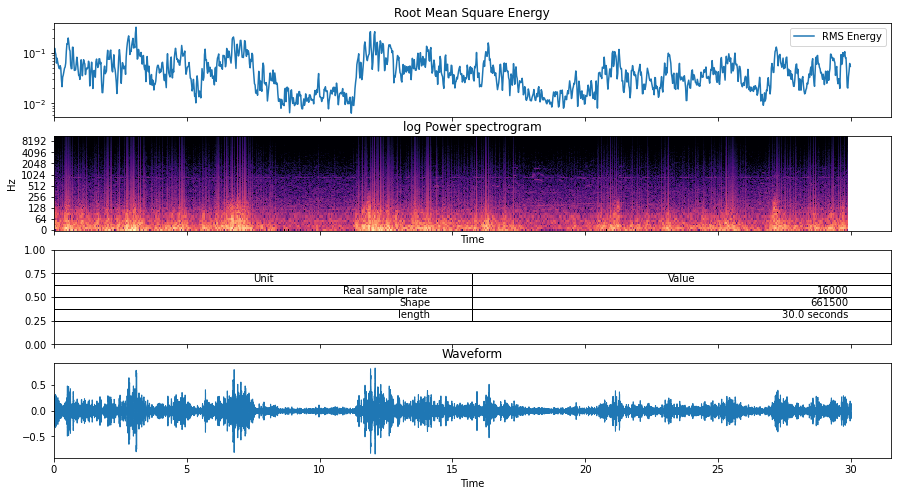

In [105]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(15,8))
times = librosa.times_like(rms)
ax[0].set(title= 'Root Mean Square Energy')
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time',ax=ax[1])
ax[1].set(title='log Power spectrogram')
S = librosa.magphase(librosa.stft(y, window=np.ones, center=False))[0]
librosa.feature.rms(y=y)
ax[3].set(title= 'Waveform')
librosa.display.waveshow(y, sr=sr) # used to be: librosa.display.waveplot
clust_data = [["Real sample rate ", real_sr],['Shape', y.shape[0]], ['length', (f'{x} seconds')]]
collabel=("Unit", 'Value')
#ax[3].axis('tight')
#ax[3].axis('off')
the_table = ax[2].table(cellText=clust_data,colLabels=collabel,loc='center')
plt.show()

## 2. RMS Energy advanced example

In [82]:
from glob import glob
my_wavs=glob('*.wav')
print(my_wavs)

['11k16bitpcm.wav', 'claxon_1m.wav', 'claxon_close.wav', 'claxon_freesound.wav', 'claxon_iphone.wav', 'claxon_michiel.wav', 'converted.wav', 'example.wav', 'file.wav', 'loudness.wav', 'miaow_16k.wav', 'my-audio.wav', 'my_test.wav', 'my_wav.wav', 'new_file.wav', 'noise_add.wav', 'out.wav', 'output.wav', 'piano_c.wav', 'robot0.wav', 'robot1.wav', 'robot2.wav', 'robot3.wav', 'Sample_audio.wav', 'silence.wav', 'speech_whistling2.wav', 'test.wav', 'test2.wav', 'test3.wav', 'tone_220.wav', 'tone_440.wav', 'welcome.wav']


In [83]:
#define the Frame Size and Hop length
audio_file='piano_c.wav'
FRAME_SIZE = 1024
HOP_LENGTH = FRAME_SIZE / 2
print(audio_path)

piano_c.wav


In [84]:
import librosa
y, sr = librosa.load(audio_file)
print(y)
len_y= len(y)
print(f'Length of the file is: {len_y} ')
print(f'The sample rate is: {sr}')

[-3.4512475e-01 -5.7962286e-01 -5.7255304e-01 ...  3.0739122e-06
 -4.8659481e-06 -7.1212735e-06]
Length of the file is: 33968 
The sample rate is: 22050


In [85]:
librosa.feature.rms(y=y)

array([[2.90298373e-01, 3.55290174e-01, 4.13190275e-01, 4.07016903e-01,
        3.97898972e-01, 3.78272772e-01, 3.44275773e-01, 2.96900928e-01,
        2.57889479e-01, 2.28880540e-01, 2.11275443e-01, 2.08597645e-01,
        1.98060125e-01, 1.74815699e-01, 1.51659697e-01, 1.38961479e-01,
        1.30569279e-01, 1.34846911e-01, 1.37389451e-01, 1.38880134e-01,
        1.37308851e-01, 1.31438136e-01, 1.21054806e-01, 1.09110251e-01,
        1.00341722e-01, 9.00820270e-02, 8.01594555e-02, 7.56025985e-02,
        7.01339245e-02, 6.69957995e-02, 6.77616000e-02, 6.63087144e-02,
        6.63581789e-02, 6.61372766e-02, 6.53025806e-02, 6.45810589e-02,
        6.21160679e-02, 5.90747297e-02, 5.75730279e-02, 5.58464453e-02,
        5.33982106e-02, 5.22538461e-02, 5.04841283e-02, 5.05740345e-02,
        5.31067513e-02, 5.55011518e-02, 5.61574697e-02, 5.50942644e-02,
        5.27324714e-02, 4.95752878e-02, 4.68301661e-02, 4.51545119e-02,
        4.38464507e-02, 4.28973027e-02, 4.41458225e-02, 4.587807

In [62]:
rms_file = librosa.feature.rms(y=y)

In [63]:
print(type(rms_file))
print(rms_file)

<class 'numpy.ndarray'>
[[2.90298373e-01 3.55290174e-01 4.13190275e-01 4.07016903e-01
  3.97898972e-01 3.78272772e-01 3.44275773e-01 2.96900928e-01
  2.57889479e-01 2.28880540e-01 2.11275443e-01 2.08597645e-01
  1.98060125e-01 1.74815699e-01 1.51659697e-01 1.38961479e-01
  1.30569279e-01 1.34846911e-01 1.37389451e-01 1.38880134e-01
  1.37308851e-01 1.31438136e-01 1.21054806e-01 1.09110251e-01
  1.00341722e-01 9.00820270e-02 8.01594555e-02 7.56025985e-02
  7.01339245e-02 6.69957995e-02 6.77616000e-02 6.63087144e-02
  6.63581789e-02 6.61372766e-02 6.53025806e-02 6.45810589e-02
  6.21160679e-02 5.90747297e-02 5.75730279e-02 5.58464453e-02
  5.33982106e-02 5.22538461e-02 5.04841283e-02 5.05740345e-02
  5.31067513e-02 5.55011518e-02 5.61574697e-02 5.50942644e-02
  5.27324714e-02 4.95752878e-02 4.68301661e-02 4.51545119e-02
  4.38464507e-02 4.28973027e-02 4.41458225e-02 4.58780751e-02
  4.69394214e-02 4.75478843e-02 4.66078222e-02 4.40841019e-02
  4.10389490e-02 3.96785326e-02 3.36309150e-02

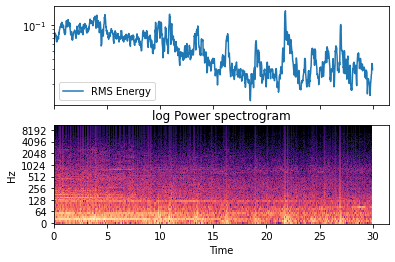

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
rms = librosa.feature.rms(y=y)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
S = librosa.magphase(librosa.stft(y, window=np.ones, center=False))[0]
librosa.feature.rms(y=y)
plt.show()

## 3. Sound Pressure level
source: https://solveforum.com/forums/threads/solved-how-to-plot-graph-automatically-sound-pressure-level.694103/

In [2]:
  !pip install pysine

In [2]:
%matplotlib inline
import pyaudio
import numpy as np
import wave
import threading
from pysine import sine
import math
import time
import audioop #standard python library. https://docs.python.org/3/library/audioop.html Deprecated in 3.11 !
from pysine import sine
import sys
import asyncio
import matplotlib.pyplot as plt
from scipy.io import wavfile
import seaborn as sns
import pylab #confusing library


CHUNK = 1024*4
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
pa = pyaudio.PyAudio()
stream = pa.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)



def Frequency():
    
    frequencyList = [20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,12000,14000,16000,18000,20000]
    for frequency in frequencyList:
        sine(frequency = (float(frequency)),duration = 2.0)
    

def print_sound():
    while True:
        total = 0
        data = stream.read(CHUNK,exception_on_overflow=False)
        reading = audioop.max(data, 2)
        total = 20 * (math.log10(abs(reading)))
        print(int(total))

t1 = threading.Thread(target=print_sound)
t2 = threading.Thread(target=Frequency)
t1.start()
#t2.start()

41
22
24
25
26
28
15
36
34
38
43
42
43
41
45
47
43
41
44
49
42
41
45
49
49
51
44
38
45
39
39
37
37
40
40
45
70
46
40
40
35
33
37
41
46
42
44
43
38
40
41
57
55
54
51
37
40
44
41
36
42
37
37
32
37
42
36
33
28
33
26
24
21
13
9
9
25
19
25
19
13
22
23
28
25
19
9
60
58
38
30
27
20
34
34
25
22
25
18
12
12
9
6
6
6
9
6
16
15
27


### Live plotting of the calculated dB

<IPython.core.display.Javascript object>


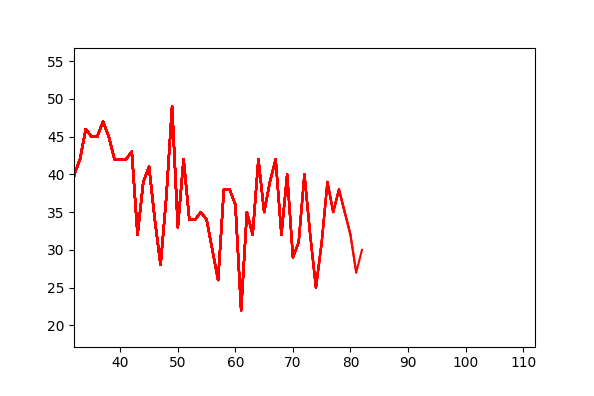

KeyboardInterrupt: 

In [11]:
%matplotlib notebook
import pyaudio
import math
import audioop #standard python library. https://docs.python.org/3/library/audioop.html Deprecated in 3.11 !
import time
import matplotlib.pyplot as plt

CHUNK = 1024*4
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
pa = pyaudio.PyAudio()
stream = pa.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()
i = 0
x, y = [],[]

while True:
    total = 0
    data = stream.read(CHUNK,exception_on_overflow=False)
    reading = audioop.max(data, 2)
    total = 20 * (math.log10(abs(reading)))
    #print(int(total))
    x.append(i)
    y.append(int(total))
    ax.plot(x,y, color='r')
    
    fig.canvas.draw()
    
    ax.set_xlim(left=max(0, i-50), right=i+30)
    
    time.sleep(0.5)
    i += 1

## 4. SPL other ways of doing it (TO DO)
source: https://www.youtube.com/watch?v=jp1AkBDQ-8k

In [12]:
#https://stackoverflow.com/questions/66138578/convert-waves-to-decibels-in-python
from pydub import AudioSegment
import numpy as np
import soundfile as sfile
import math
import matplotlib.pyplot as plt
filename = 'Alesis-Sanctuary-QCard-Crickets.wav'
# https://freewavesamples.com/files/Alesis-Sanctuary-QCard-Crickets.wav

audio=AudioSegment.from_mp3(filename)
signal, sr = sfile.read(filename)
samples=audio.get_array_of_samples()
samples_sf=0
try:
    samples_sf = signal[:, 0]  # use the first channel for dual
except:
    samples_sf=signal  # for mono


def convert_to_decibel(arr):
    ref = 1
    if arr!=0:
        return 20 * np.log10(abs(arr) / ref)
        
    else:
        return -60

data=[convert_to_decibel(i) for i in samples_sf]
percentile=np.percentile(data,[25,50,75])
print(f"1st Quartile : {percentile[0]}")
print(f"2nd Quartile : {percentile[1]}")
print(f"3rd Quartile : {percentile[2]}")
print(f"Mean : {np.mean(data)}")

ModuleNotFoundError: No module named 'pydub'